In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("1401.xlsx",header = [0,1])

In [3]:
df.head()

نام مشترک          کد اشتراک         نوع پروانه  \
          Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  آرمند بتن             520009              صنعتی   
1   ابوالفضل  خورسند اترآباد             200654            کشاورزی   
2        ابوالفضل  مقرب زاده             622162            کشاورزی   
3        احمد  ابراهیمی مقدم             515618            کشاورزی   
4      احمد  جوپای ناجی آباد             529232            کشاورزی   

               استان            شهرستان            امور آب    محدوده مطالعاتی  \
  Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1   
0        خراسان رضوی               مشهد                NaN                NaN   
1        خراسان رضوی              قوچان                NaN                NaN   
2        خراسان رضوی        تربت حیدریه                NaN                NaN   
3        خراسان رضوی               مشهد                NaN                NaN   
4        خراسان رضوی               مشهد                NaN                NaN   

         سریال کنتور         سایز کنتور          تاریخ نصب  ...  \
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1  ...   
0       909801058196                 50         1402/11/15  ...   
1       909801034787                 80         1400/02/12  ...   
2       909801061701                 50         1403/02/27  ...   
3       909801035022                125         1400/02/30  ...   
4       909801046032                125         1401/06/23  ...   

            1401/11                    1401/12                               \
  تعداد مورد انتظار درصد اطلاعات موجود دبی l/s تعداد دبی منفی درصد دبی منفی   
0                30                0.0     NaN              0             0   
1                30              100.0    1.06              0             0   
2                30                0.0     NaN              0             0   
3                30                0.0     NaN              0             0   
4                30              100.0    5.78              0             0   

                                                                        \
  ساعت کارکرد (h) مصرف (m³) (m³) تعداد اطلاعات موجود تعداد مورد انتظار   
0             NaN            NaN                   0                29   
1         17190.7         638.81                  29                29   
2             NaN            NaN                   0                29   
3             NaN            NaN                   0                29   
4         26865.2       14161.93                  29                29   

                      
  درصد اطلاعات موجود  
0                0.0  
1              100.0  
2                0.0  
3                0.0  
4              100.0  

[5 rows x 111 columns]

In [4]:
column_translations = {
    'کد اشتراک': 'Subscription Code',
    'نوع پروانه': 'License Type',
    'شهرستان': 'County',
    'سریال کنتور': 'Meter Serial',
    'سایز کنتور': 'Meter Size',
    'تاریخ نصب': 'Installation Date',
    'زمان آخرین اتصال': 'Last Connection Time',
    'مصرف بازه (m³)': 'Consumption in Period (m³)',
    'ساعت کارکرد بازه (h)': 'Operating Hours in Period (h)',
    'میانگین دبی بازه l/s': 'Average Flow Rate in Period (l/s)',
    'دبی l/s': 'Flow Rate (l/s)',
    'تعداد دبی منفی': 'Number of Negative Flows',
    'درصد دبی منفی': 'Percentage of Negative Flows',
    'ساعت کارکرد (h)': 'Operating Hours (h)',
    'مصرف (m³) (m³)': 'Consumption (m³)',
    'تعداد اطلاعات موجود': 'Number of Available Data Points',
}

In [5]:
inf_cols = df.columns[:15] 
df_info = df[inf_cols]

In [6]:
usage_cols = df.columns[15:] 
df_usage = df[usage_cols]

In [7]:
df_info.shape , df_usage.shape

((2218, 15), (2218, 96))

In [8]:
df_info.head()

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1,Unnamed: 13_level_1,Unnamed: 14_level_1
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.93,343575.4,1.15
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.60,475073.2,6.91
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.69,68022.1,6.00


In [9]:
df_usage.head()

1401/01                                                              \
  دبی l/s تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³)   
0     NaN              0           0.0             NaN            NaN   
1    1.38              0           0.0         16492.8        2727.77   
2     NaN              0           0.0             NaN            NaN   
3    7.05              0           0.0         29319.6       14647.50   
4     NaN              0           0.0             NaN            NaN   

                                                           1401/02  \
  تعداد اطلاعات موجود تعداد مورد انتظار درصد اطلاعات موجود دبی l/s   
0                   0                31                0.0     NaN   
1                  31                31              100.0    1.27   
2                   0                31                0.0     NaN   
3                  31                31              100.0    6.11   
4                   0                31                0.0     NaN   

                  ...           1401/11                    1401/12  \
  تعداد دبی منفی  ... تعداد مورد انتظار درصد اطلاعات موجود دبی l/s   
0              0  ...                30                0.0     NaN   
1              0  ...                30              100.0    1.06   
2              0  ...                30                0.0     NaN   
3              0  ...                30                0.0     NaN   
4              0  ...                30              100.0    5.78   

                                                               \
  تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³)   
0              0             0             NaN            NaN   
1              0             0         17190.7         638.81   
2              0             0             NaN            NaN   
3              0             0             NaN            NaN   
4              0             0         26865.2       14161.93   

                                                            
  تعداد اطلاعات موجود تعداد مورد انتظار درصد اطلاعات موجود  
0                   0                29                0.0  
1                  29                29              100.0  
2                   0                29                0.0  
3                   0                29                0.0  
4                  29                29              100.0  

[5 rows x 96 columns]

In [10]:
usage_cols = df_usage.columns[15:]

In [11]:
usage_cols

MultiIndex([('1401/02',  'درصد اطلاعات موجود'),
            ('1401/03',             'دبی l/s'),
            ('1401/03',      'تعداد دبی منفی'),
            ('1401/03',       'درصد دبی منفی'),
            ('1401/03',     'ساعت کارکرد (h)'),
            ('1401/03',      'مصرف (m³) (m³)'),
            ('1401/03', 'تعداد اطلاعات موجود'),
            ('1401/03',   'تعداد مورد انتظار'),
            ('1401/03',  'درصد اطلاعات موجود'),
            ('1401/04',             'دبی l/s'),
            ('1401/04',      'تعداد دبی منفی'),
            ('1401/04',       'درصد دبی منفی'),
            ('1401/04',     'ساعت کارکرد (h)'),
            ('1401/04',      'مصرف (m³) (m³)'),
            ('1401/04', 'تعداد اطلاعات موجود'),
            ('1401/04',   'تعداد مورد انتظار'),
            ('1401/04',  'درصد اطلاعات موجود'),
            ('1401/05',             'دبی l/s'),
            ('1401/05',      'تعداد دبی منفی'),
            ('1401/05',       'درصد دبی منفی'),
            ('1401/05',     'ساعت کارکرد

In [12]:
months = df_usage.columns.levels[0][:12]

In [13]:
df_usage = pd.concat([df_info[['نام مشترک','کد اشتراک']],df_usage] , axis = 1)

In [14]:
df_usage

نام مشترک          کد اشتراک 1401/01                 \
             Unnamed: 0_level_1 Unnamed: 1_level_1 دبی l/s تعداد دبی منفی   
0                     آرمند بتن             520009     NaN              0   
1      ابوالفضل  خورسند اترآباد             200654    1.38              0   
2           ابوالفضل  مقرب زاده             622162     NaN              0   
3           احمد  ابراهیمی مقدم             515618    7.05              0   
4         احمد  جوپای ناجی آباد             529232     NaN              0   
...                         ...                ...     ...            ...   
2213              یعقوب  ریاحی              925247     NaN              0   
2214     یعقوبعلی هاتفی اردکانی             518473   12.84              0   
2215                یوسف  امانی             201250     NaN              0   
2216               یوسف  گلزاری             925005   21.69              0   
2217      ﺷﺮﮐﺖ ﭘﺎرس ﻓﻮﻻد ﺳﺒﺰوار             102290     NaN              0   

                                                                       \
     درصد دبی منفی ساعت کارکرد (h) مصرف (m³) (m³) تعداد اطلاعات موجود   
0              0.0             NaN            NaN                   0   
1              0.0         16492.8        2727.77                  31   
2              0.0             NaN            NaN                   0   
3              0.0         29319.6       14647.50                  31   
4              0.0             NaN            NaN                   0   
...            ...             ...            ...                 ...   
2213           0.0             0.0           0.00                  31   
2214           0.0        106320.6       32388.00                  31   
2215           0.0             0.0           0.00                  31   
2216           0.0         39729.8       58070.90                  31   
2217           0.0             NaN            NaN                   0   

                                           ...           1401/11  \
     تعداد مورد انتظار درصد اطلاعات موجود  ... تعداد مورد انتظار   
0                   31                0.0  ...                30   
1                   31              100.0  ...                30   
2                   31                0.0  ...                30   
3                   31              100.0  ...                30   
4                   31                0.0  ...                30   
...                ...                ...  ...               ...   
2213                31              100.0  ...                30   
2214                31              100.0  ...                30   
2215                31              100.0  ...                30   
2216                31              100.0  ...                30   
2217                31                0.0  ...                30   

                        1401/12                                               \
     درصد اطلاعات موجود دبی l/s تعداد دبی منفی درصد دبی منفی ساعت کارکرد (h)   
0                   0.0     NaN              0             0             NaN   
1                 100.0    1.06              0             0         17190.7   
2                   0.0     NaN              0             0             NaN   
3                   0.0     NaN              0             0             NaN   
4                 100.0    5.78              0             0         26865.2   
...                 ...     ...            ...           ...             ...   
2213              100.0    2.27              0             0         36518.0   
2214                0.0     NaN              0             0             NaN   
2215              100.0     NaN              0             0             NaN   
2216              100.0   26.53              0             0         81798.8   
2217                0.0     NaN              0             0             NaN   

                                                                              
     مصرف (m³) (m³) تعداد اطلاعات موجود تعداد مورد انتظار درصد اط

In [15]:
repeated_cols = ['تعداد اطلاعات موجود', 'تعداد دبی منفی', 'تعداد مورد انتظار', 'دبی l/s',
       'درصد اطلاعات موجود', 'درصد دبی منفی', 'ساعت کارکرد (h)',
       'مصرف (m³) (m³)']

In [16]:
df_long = pd.DataFrame()
for i in months:
    temp_df = pd.DataFrame()
    month_temp = pd.DataFrame({"month":[str(i) for j in range(len(df_usage[i]))]})
    temp_df = pd.concat([df_info['کد اشتراک'],df_usage[i],month_temp],axis = 1)
    df_long = pd.concat([df_long,temp_df])

In [77]:
df_info['customer_id_str']

0       520009
1       200654
2       622162
3       515618
4       529232
         ...  
2213    925247
2214    518473
2215    201250
2216    925005
2217    102290
Name: customer_id_str, Length: 2218, dtype: object

In [17]:
df_long[df_long["Unnamed: 1_level_1"] == "925005"]

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
2216,925005,21.69,0,0.0,39729.8,58070.9,31,31,100.00,1401/01
2216,925005,21.54,0,0.0,7215.8,8498.9,5,31,16.13,1401/02
2216,925005,NaN,0,0.0,NaN,-549705.9,1,31,3.23,1401/03
2216,925005,33.05,0,0.0,16311.0,488831.3,10,31,32.26,1401/04
2216,925005,34.21,0,0.0,52524.0,73376.0,31,31,100.00,1401/05
2216,925005,34.54,0,0.0,80053.0,84919.6,31,31,100.00,1401/06
2216,925005,35.30,0,0.0,67065.0,81571.2,30,30,100.00,1401/07
2216,925005,31.56,0,0.0,22317.9,19269.1,30,30,100.00,1401/08
2216,925005,27.72,0,0.0,1226.8,4570.4,30,30,100.00,1401/09
2216,925005,26.44,0,0.0,69614.6,37993.3,30,30,100.00,1401/10


In [18]:
len(df)

2218

In [19]:
len(df_long)/12

2218.0

In [20]:
# df_info has a MultiIndex header, flatten it to use the top level
df_info.columns = df_info.columns.get_level_values(0)

In [21]:
df_long.rename({    "Unnamed: 1_level_1" : "subscrition code" } , inplace= True)

In [22]:
df_long

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
1,200654,1.38,0,0.0,16492.8,2727.77,31,31,100.0,1401/01
2,622162,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
3,515618,7.05,0,0.0,29319.6,14647.50,31,31,100.0,1401/01
4,529232,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
...,...,...,...,...,...,...,...,...,...,...
2213,925247,2.27,0,0.0,36518.0,2353.23,29,29,100.0,1401/12
2214,518473,NaN,0,0.0,NaN,NaN,0,29,0.0,1401/12
2215,201250,NaN,0,0.0,NaN,0.00,29,29,100.0,1401/12
2216,925005,26.53,0,0.0,81798.8,30496.90,29,29,100.0,1401/12


In [23]:
# Perform statistical analysis and extract insights from df_long

print("--- Statistical Analysis of Water Usage Data ---")

--- Statistical Analysis of Water Usage Data ---


In [24]:
# 1. Overall Descriptive Statistics
# Provides a summary of the central tendency, dispersion, and shape of the distribution
# for the numerical columns across all customer-months.
print("\n1. Overall Descriptive Statistics:")
numerical_cols_for_desc = ['دبی l/s', 'ساعت کارکرد (h)', 'مصرف (m³) (m³)',
                           'تعداد دبی منفی']
print(df_long[numerical_cols_for_desc].describe())


1. Overall Descriptive Statistics:
           دبی l/s  ساعت کارکرد (h)  مصرف (m³) (m³)  تعداد دبی منفی
count  9729.000000     1.011500e+04    1.272500e+04    26616.000000
mean     10.467803     7.818622e+04   -5.357606e+04        0.078862
std      27.569482     2.783220e+06    9.372731e+06        1.007794
min       0.100000    -2.207800e+03   -1.056963e+09        0.000000
25%       2.200000     9.626000e+02    4.880000e+00        0.000000
50%       6.370000     1.308390e+04    1.632470e+03        0.000000
75%      15.410000     5.666165e+04    1.875930e+04        0.000000
max    2271.780000     2.796053e+08    9.152365e+06       31.000000


In [25]:
df_long.info() , len (df_long)

<class 'pandas.core.frame.DataFrame'>
Index: 26616 entries, 0 to 2217
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 1_level_1   26616 non-null  object 
 1   دبی l/s              9729 non-null   float64
 2   تعداد دبی منفی       26616 non-null  int64  
 3   درصد دبی منفی        26616 non-null  float64
 4   ساعت کارکرد (h)      10115 non-null  float64
 5   مصرف (m³) (m³)       12725 non-null  float64
 6   تعداد اطلاعات موجود  26616 non-null  int64  
 7   تعداد مورد انتظار    26616 non-null  int64  
 8   درصد اطلاعات موجود   26616 non-null  float64
 9   month                26616 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.2+ MB


(None, 26616)

In [26]:
df_long[df_long['تعداد دبی منفی'] > 0]

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
38,514059,4.06,21,67.74,30651.2,217861.500,31,31,100.00,1401/01
54,515122,11.97,1,3.23,32644.9,117254.310,31,31,100.00,1401/01
72,805221,0.74,5,16.13,34049.8,18570.289,18,31,58.06,1401/01
80,301144,1.20,1,3.23,13119.5,2.640,31,31,100.00,1401/01
84,515530,11.07,5,16.13,193865.7,248740.010,31,31,100.00,1401/01
...,...,...,...,...,...,...,...,...,...,...
2182,107145,8.38,5,16.13,174788.4,104894.380,31,31,100.00,1401/06
2183,107149,19.44,1,3.23,5932.9,5738.400,31,31,100.00,1401/06
623,529150,6.30,3,10.00,12016.1,-2244.400,14,30,46.67,1401/07
682,615609,0.10,1,3.33,NaN,-1.017,14,30,46.67,1401/07


In [27]:
df_long[df_long['مصرف (m³) (m³)'] < 0].min()

Unnamed: 1_level_1            100085
دبی l/s                          0.1
تعداد دبی منفی                     0
درصد دبی منفی                    0.0
ساعت کارکرد (h)              -2207.8
مصرف (m³) (m³)        -1056962687.88
تعداد اطلاعات موجود                1
تعداد مورد انتظار                 29
درصد اطلاعات موجود              3.23
month                        1401/01
dtype: object

In [28]:
df_long[df_long['ساعت کارکرد (h)'] < 0]

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month
1956,541975,0.48,3,9.68,-2207.8,-80.01,7,31,22.58,1401/02


In [29]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   نام مشترک             2218 non-null   object 
 1   کد اشتراک             2218 non-null   object 
 2   نوع پروانه            1567 non-null   object 
 3   استان                 2218 non-null   object 
 4   شهرستان               2218 non-null   object 
 5   امور آب               1 non-null      object 
 6   محدوده مطالعاتی       0 non-null      float64
 7   سریال کنتور           2218 non-null   int64  
 8   سایز کنتور            2218 non-null   int64  
 9   تاریخ نصب             2218 non-null   object 
 10  زمان آخرین اتصال      2112 non-null   object 
 11  قطع کن                2218 non-null   bool   
 12  مصرف بازه (m³)        1319 non-null   float64
 13  ساعت کارکرد بازه (h)  1200 non-null   float64
 14  میانگین دبی بازه l/s  1181 non-null   float64
dtypes: bool(1), float64(4

In [61]:
# 2. Descriptive Statistics Grouped by Customer
# Shows the average behavior of each customer over the analyzed period.
# This helps identify customers with consistently high/low usage, operating hours, etc.
print("2. Descriptive Statistics per Customer (Mean across months):")
customer_grouped_mean = df_long.groupby('Unnamed: 1_level_1')[numerical_cols_for_desc].mean()
customer_grouped_mean.head() # Displaying head as the table can be large

2. Descriptive Statistics per Customer (Mean across months):


,دبی l/s,ساعت کارکرد (h),مصرف (m³) (m³),تعداد دبی منفی
Unnamed: 1_level_1,,,,
تبادل چاه شماره 6,10.6,NaN,65.620333,0.0
0000297,NaN,NaN,NaN,0.0
000134,NaN,NaN,NaN,0.0
000159,NaN,NaN,NaN,0.0
000163,NaN,NaN,NaN,0.0


In [57]:
df_info[df_info['customer_id_str'] == "تبادل چاه شماره 6"]

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s,customer_id_str


In [70]:
customer_grouped_mean.describe()

,دبی l/s,ساعت کارکرد (h),مصرف (m³) (m³),تعداد دبی منفی
count,1175.000000,1.194000e+03,1.312000e+03,2201.000000
mean,10.615329,6.022914e+04,-3.927377e+04,0.079150
std,22.101614,6.781651e+05,2.435213e+06,0.550667
min,0.100000,0.000000e+00,-8.807548e+07,0.000000
25%,2.183667,1.290143e+03,1.462387e+02,0.000000
50%,6.644545,1.218957e+04,3.951058e+03,0.000000
75%,15.176500,5.093040e+04,2.269894e+04,0.000000
max,636.733333,2.331771e+07,2.888905e+06,13.916667


In [72]:
customer_grouped_mean[customer_grouped_mean['مصرف (m³) (m³)'] < 0 ].count()

دبی l/s            30
ساعت کارکرد (h)    43
مصرف (m³) (m³)     45
تعداد دبی منفی     45
dtype: int64

In [63]:
df_info

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s,customer_id_str
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN,520009
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.930,343575.4,1.15,200654
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN,622162
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.600,475073.2,6.91,515618
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.690,68022.1,6.00,529232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,یعقوب ریاحی,925247,کشاورزی,خراسان رضوی,باخرز,NaN,NaN,909801035013,50,1400/03/24,1404/01/28 - 02:10:01,False,5685.400,56574.8,3.30,925247
2214,یعقوبعلی هاتفی اردکانی,518473,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801032684,100,1399/06/03,1404/01/28 - 03:01:20,False,250173.700,909533.1,12.28,518473
2215,یوسف امانی,201250,NaN,خراسان رضوی,قوچان,NaN,NaN,909801032982,50,1399/07/07,1404/01/28 - 02:10:42,False,8595.251,3673.9,2.66,201250
2216,یوسف گلزاری,925005,کشاورزی,خراسان رضوی,باخرز,NaN,NaN,909801035005,100,1400/03/03,1403/07/29 - 02:04:50,False,338274.800,437856.7,30.17,925005


(array([2.094e+03, 4.100e+01, 2.000e+01, 1.200e+01, 8.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.        ,  0.27833333,  0.55666667,  0.835     ,  1.11333333,
         1.39166667,  1.67      ,  1.94833333,  2.22666667,  2.505     ,
         2.78333333,  3.06166667,  3.34      ,  3.61833333,  3.89666667,
         4.175     ,  4.45333333,  4.73166667,  5.01      ,  5.28833333,
         5.56666667,  5.845     ,  6.12333333,  6.40166667,  6.68      ,
         6.

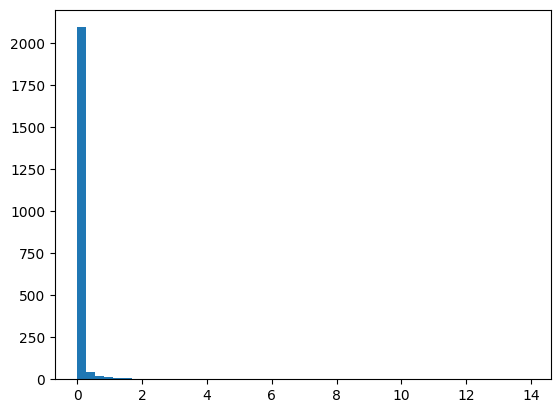

In [32]:
plt.hist(customer_grouped_mean['تعداد دبی منفی'],bins = 50)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   3.,   1.,
          1.,   3., 155.]),
 array([-10000.,  -9600.,  -9200.,  -8800.,  -8400.,  -8000.,  -7600.,
         -7200.,  -6800.,  -6400.,  -6000.,  -5600.,  -5200.,  -4800.,
         -4400.,  -4000.,  -3600.,  -3200.,  -2800.,  -2400.,  -2000.,
         -1600.,  -1200.,   -800.,   -400.,      0.]),
 <BarContainer object of 25 artists>)

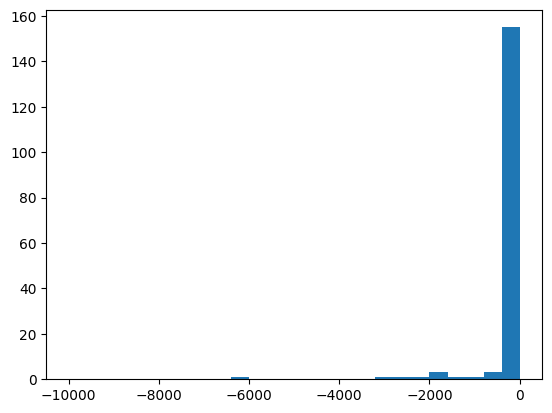

In [69]:
plt.hist(customer_grouped_mean['مصرف (m³) (m³)'],bins=25,range=(-10000,0))

<Axes: xlabel='ساعت کارکرد (h)', ylabel='مصرف (m³) (m³)'>

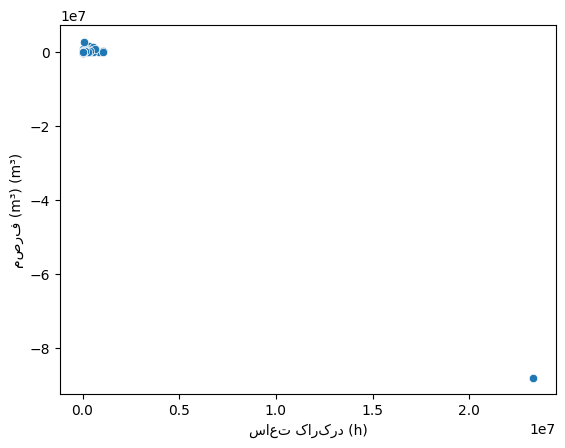

In [34]:
sns.scatterplot(x = customer_grouped_mean['ساعت کارکرد (h)'],y =  customer_grouped_mean['مصرف (m³) (m³)'])

In [35]:
# 3. Data Quality Analysis
# Analyze metrics related to data completeness and errors (like negative flow).
print("3. Data Quality Summary:")
# Analyze negative flow percentage?
neg_flow_issues_count = df_long[df_long['درصد دبی منفی'] > 0].shape[0]
total_customer_months = df_long.shape[0]
print(f"- Number of customer-months with negative flow issues (> 0%): {neg_flow_issues_count}")
print(f"- Percentage of customer-months with negative flow issues: {neg_flow_issues_count / total_customer_months * 100:.2f}%")

3. Data Quality Summary:
- Number of customer-months with negative flow issues (> 0%): 545
- Percentage of customer-months with negative flow issues: 2.05%


In [36]:
# Analyze data availability percentage
low_data_availability_count = df_long[df_long['درصد اطلاعات موجود'] < 50].shape[0] # Example threshold: < 50%
print(f"- Number of customer-months with low data availability (< 50%): {low_data_availability_count}")
print(f"- Percentage of customer-months with low data availability (< 50%): {low_data_availability_count / total_customer_months * 100:.2f}%")

- Number of customer-months with low data availability (< 50%): 14311
- Percentage of customer-months with low data availability (< 50%): 53.77%


In [37]:
# 4. Correlation Analysis
# Examine relationships between different numerical variables.
print("4. Correlation Matrix for Numerical Columns:")
# Calculate correlation matrix
correlation_matrix = df_long[numerical_cols_for_desc].corr()
correlation_matrix
#print("Interpretation: Values close to 1 or -1 indicate strong positive or negative linear correlation.")

4. Correlation Matrix for Numerical Columns:


,دبی l/s,ساعت کارکرد (h),مصرف (m³) (m³),تعداد دبی منفی
دبی l/s,1.000000,-0.003124,0.003753,0.075360
ساعت کارکرد (h),-0.003124,1.000000,-0.998094,0.007647
مصرف (m³) (m³),0.003753,-0.998094,1.000000,0.013878
تعداد دبی منفی,0.075360,0.007647,0.013878,1.000000


In [38]:

# 5. Identifying Interesting Cases / Potential Outliers
# Find customers with extreme values for key metrics.

# Top consumers by average monthly consumption
print("5. Top 10 Customers by Average Monthly Consumption:")
top_consumers = customer_grouped_mean.sort_values(by='مصرف (m³) (m³)', ascending=False)
print(top_consumers[['مصرف (m³) (m³)', 'ساعت کارکرد (h)', 'دبی l/s']].head(10))

5. Top 10 Customers by Average Monthly Consumption:
                    مصرف (m³) (m³)  ساعت کارکرد (h)    دبی l/s
Unnamed: 1_level_1                                            
529293                2.888905e+06     80443.800000  25.250000
514097                1.537653e+06    358369.980000   4.135000
529014                1.294875e+06    517810.870000   7.541000
529066                8.081404e+05    265105.018182  28.287273
529161                7.749497e+05    619306.700000  13.288000
529109                7.558290e+05     38305.225000  34.812500
529079                6.523485e+05    190272.158333  14.311667
514901                6.220483e+05    214115.675000   8.886250
514017                5.971838e+05    159496.158333  30.139167
100085                5.857003e+05     16675.150000  16.692500


In [ ]:
top_consumers = customer_grouped_mean.sort_values(by='مصرف (m³) (m³)', ascending=False)

In [39]:

# Customers with highest average negative flow percentage
print("Top 10 Customers by Average Monthly Negative Flow Percentage:")
top_neg_flow = customer_grouped_mean.sort_values(by= "تعداد دبی منفی" , ascending=False)
print(top_neg_flow[[ 'تعداد دبی منفی']].head(10))

Top 10 Customers by Average Monthly Negative Flow Percentage:
                    تعداد دبی منفی
Unnamed: 1_level_1                
529150                   13.916667
514097                   13.250000
515478                    7.333333
529293                    6.666667
516620                    5.083333
529079                    4.333333
529014                    3.750000
514901                    3.500000
514699                    3.333333
805657                    3.333333


In [55]:
df_info[df_info['customer_id_str'] == "529150"]

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s,customer_id_str
623,حسین خجسته,529150,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801032911,100,1399/06/20,1403/04/01 - 00:58:29,False,609020.481,151536.8,10.45,529150


In [40]:
df_info.head()

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.93,343575.4,1.15
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.60,475073.2,6.91
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.69,68022.1,6.00


In [41]:

# Merge df_long with df_info on customer ID ('Unnamed: 1_level_1' and 'کد اشتراک')
# Convert IDs to string for robust merging
df_long['customer_id_str'] = df_long['Unnamed: 1_level_1'].astype(str)

In [42]:
df_info.columns

Index(['نام مشترک', 'کد اشتراک', 'نوع پروانه', 'استان', 'شهرستان', 'امور آب',
       'محدوده مطالعاتی', 'سریال کنتور', 'سایز کنتور', 'تاریخ نصب',
       'زمان آخرین اتصال', 'قطع کن', 'مصرف بازه (m³)', 'ساعت کارکرد بازه (h)',
       'میانگین دبی بازه l/s'],
      dtype='object')

In [43]:

# Assuming df_info is available from previous cells and has 'کد اشتراک'
df_info['customer_id_str'] = df_info['کد اشتراک'].astype(str)

# Select relevant columns from df_info for merging and drop potential duplicates on merge key
df_info_subset = df_info[['customer_id_str', 'نوع پروانه']].drop_duplicates(subset=['customer_id_str'])

df_long_merged = pd.merge(df_long, df_info_subset, on='customer_id_str', how='left')

# Drop the temporary merge key from df_long_merged
df_long_merged = df_long_merged.drop(columns=['customer_id_str'])


/tmp/ipykernel_13631/2520238295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['customer_id_str'] = df_info['کد اشتراک'].astype(str)


In [44]:
df_long_merged

,Unnamed: 1_level_1,دبی l/s,تعداد دبی منفی,درصد دبی منفی,ساعت کارکرد (h),مصرف (m³) (m³),تعداد اطلاعات موجود,تعداد مورد انتظار,درصد اطلاعات موجود,month,نوع پروانه
0,520009,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01,صنعتی
1,200654,1.38,0,0.0,16492.8,2727.77,31,31,100.0,1401/01,کشاورزی
2,622162,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01,کشاورزی
3,515618,7.05,0,0.0,29319.6,14647.50,31,31,100.0,1401/01,کشاورزی
4,529232,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01,کشاورزی
...,...,...,...,...,...,...,...,...,...,...,...
26611,925247,2.27,0,0.0,36518.0,2353.23,29,29,100.0,1401/12,کشاورزی
26612,518473,NaN,0,0.0,NaN,NaN,0,29,0.0,1401/12,کشاورزی
26613,201250,NaN,0,0.0,NaN,0.00,29,29,100.0,1401/12,NaN
26614,925005,26.53,0,0.0,81798.8,30496.90,29,29,100.0,1401/12,کشاورزی


In [45]:
df_info

,نام مشترک,کد اشتراک,نوع پروانه,استان,شهرستان,امور آب,محدوده مطالعاتی,سریال کنتور,سایز کنتور,تاریخ نصب,زمان آخرین اتصال,قطع کن,مصرف بازه (m³),ساعت کارکرد بازه (h),میانگین دبی بازه l/s,customer_id_str
0,آرمند بتن,520009,صنعتی,خراسان رضوی,مشهد,NaN,NaN,909801058196,50,1402/11/15,1404/01/28 - 03:07:28,False,NaN,NaN,NaN,520009
1,ابوالفضل خورسند اترآباد,200654,کشاورزی,خراسان رضوی,قوچان,NaN,NaN,909801034787,80,1400/02/12,1404/01/28 - 02:08:15,False,23879.930,343575.4,1.15,200654
2,ابوالفضل مقرب زاده,622162,کشاورزی,خراسان رضوی,تربت حیدریه,NaN,NaN,909801061701,50,1403/02/27,1403/09/08 - 03:10:09,False,NaN,NaN,NaN,622162
3,احمد ابراهیمی مقدم,515618,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801035022,125,1400/02/30,1404/01/28 - 02:10:25,False,103922.600,475073.2,6.91,515618
4,احمد جوپای ناجی آباد,529232,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801046032,125,1401/06/23,1404/01/28 - 02:11:21,False,84159.690,68022.1,6.00,529232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,یعقوب ریاحی,925247,کشاورزی,خراسان رضوی,باخرز,NaN,NaN,909801035013,50,1400/03/24,1404/01/28 - 02:10:01,False,5685.400,56574.8,3.30,925247
2214,یعقوبعلی هاتفی اردکانی,518473,کشاورزی,خراسان رضوی,مشهد,NaN,NaN,909801032684,100,1399/06/03,1404/01/28 - 03:01:20,False,250173.700,909533.1,12.28,518473
2215,یوسف امانی,201250,NaN,خراسان رضوی,قوچان,NaN,NaN,909801032982,50,1399/07/07,1404/01/28 - 02:10:42,False,8595.251,3673.9,2.66,201250
2216,یوسف گلزاری,925005,کشاورزی,خراسان رضوی,باخرز,NaN,NaN,909801035005,100,1400/03/03,1403/07/29 - 02:04:50,False,338274.800,437856.7,30.17,925005


In [53]:

print("\n- Comparing Mean Consumption ('مصرف (m³) (m³)') across Usage Types ('نوع پروانه'):")
# Get unique usage types (excluding NaN)
usage_types_list = [utype for utype in df_long_merged['نوع پروانه'].unique() if pd.notna(utype)]

if len(usage_types_list) >= 2:
    print(f"  Found usage types: {usage_types_list}")
    # Prepare data for ANOVA/t-test
    data_by_usage_type = []
    valid_groups = []
    for utype in usage_types_list:
        # Filter data for the current usage type and drop NaNs in consumption
        consumption_data = df_long_merged[df_long_merged['نوع پروانه'] == utype]['مصرف (m³) (m³)'].dropna()
        if len(consumption_data) > 1: # Need at least 2 data points per group for tests
            data_by_usage_type.append(consumption_data.values)
            valid_groups.append(utype)

    if len(valid_groups) >= 2:
        print(f"  Preparing to test groups: {valid_groups}")
        from scipy.stats import f_oneway, ttest_ind
        if len(valid_groups) > 2:
            print("  ANOVA test is appropriate here (requires scipy.stats.f_oneway).")

            from scipy.stats import f_oneway
            f_statistic, p_value = f_oneway(*data_by_usage_type)
            print(f'  ANOVA F-statistic: {f_statistic:.4f}')
            print(f'  ANOVA P-value: {p_value:.4f}')
            print('  Interpretation: A low p-value (< 0.05) suggests significant differences in mean consumption between these usage types.')
        elif len(valid_groups) == 2:
             print("  Independent samples t-test is appropriate here (requires scipy.stats.ttest_ind).")
             
             from scipy.stats import ttest_ind
             t_statistic, p_value = ttest_ind(data_by_usage_type[0], data_by_usage_type[1])
             print(f'  T-statistic: {t_statistic:.4f}')
             print(f'  P-value: {p_value:.4f}')
             print('  Interpretation: A low p-value (< 0.05) suggests a significant difference in mean consumption between the two usage types.')
    else:
        print("  Not enough usage types with sufficient data points (at least 2 per group) to perform group comparison tests.")
else:
    print("  Not enough unique usage types found (at least 2) to perform group comparison tests.")

# Example Test 2: Testing for Significant Linear Relationship between Operating Hours and Consumption
# This can be done using Pearson correlation test.
# Requires scipy.stats.pearsonr.

print("\n- Testing for Significant Linear Relationship between Operating Hours ('ساعت کارکرد (h)') and Consumption ('مصرف (m³) (m³)'):")
# Filter out NaNs for these two columns
df_corr_test = df_long_merged.dropna(subset=['ساعت کارکرد (h)', 'مصرف (m³) (m³)']).copy()

if len(df_corr_test) > 2: # Need at least 2 data points for correlation test
    from scipy.stats import pearsonr
    print(f"  Performing Pearson correlation test on {len(df_corr_test)} data points (requires scipy.stats.pearsonr).")
    from scipy.stats import pearsonr
    correlation_coefficient, p_value_corr = pearsonr(df_corr_test['ساعت کارکرد (h)'], df_corr_test['مصرف (m³) (m³)'])
    print(f'  Pearson Correlation Coefficient: {correlation_coefficient:.4f}')
    print(f'  P-value: {p_value_corr:.4f}')
    print('  Interpretation: A low p-value (< 0.05) suggests a significant linear relationship.')
else:
    print(f"  Not enough data points ({len(df_corr_test)}) with both Operating Hours and Consumption to perform Pearson Correlation Test.")

print("\n--- Analysis Complete ---")


- Comparing Mean Consumption ('مصرف (m³) (m³)') across Usage Types ('نوع پروانه'):
  Found usage types: ['صنعتی', 'کشاورزی', 'شرب و بهداشت دام', 'خدمات', 'سایر', 'شرب روستایی', 'شرب شهری']
  Preparing to test groups: ['صنعتی', 'کشاورزی', 'شرب و بهداشت دام', 'خدمات', 'سایر', 'شرب روستایی', 'شرب شهری']
  ANOVA test is appropriate here (requires scipy.stats.f_oneway).
  ANOVA F-statistic: 14.4077
  ANOVA P-value: 0.0000
  Interpretation: A low p-value (< 0.05) suggests significant differences in mean consumption between these usage types.

- Testing for Significant Linear Relationship between Operating Hours ('ساعت کارکرد (h)') and Consumption ('مصرف (m³) (m³)'):
  Performing Pearson correlation test on 10047 data points (requires scipy.stats.pearsonr).
  Pearson Correlation Coefficient: -0.9981
  P-value: 0.0000
  Interpretation: A low p-value (< 0.05) suggests a significant linear relationship.

--- Analysis Complete ---


In [54]:

# Note: Further analysis could involve time series analysis (if data spans multiple years),
# clustering customers based on usage patterns, regression analysis to model consumption, etc.

if len(valid_groups) >= 2:
    print(f"  Preparing to test groups: {valid_groups}")
    from scipy.stats import f_oneway, ttest_ind
    if len(valid_groups) > 2:
        print("ANOVA test is appropriate here (requires scipy.stats.f_oneway).")
        
        from scipy.stats import f_oneway
        f_statistic, p_value = f_oneway(*data_by_usage_type)
        print(f'  ANOVA F-statistic: {f_statistic:.4f}')
        print(f'  ANOVA P-value: {p_value:.4f}')
        print('  Interpretation: A low p-value (< 0.05) suggests significant differences in mean consumption between these usage types.')
    elif len(valid_groups) == 2:
            print("  Independent samples t-test is appropriate here (requires scipy.stats.ttest_ind).")
            from scipy.stats import ttest_ind
            t_statistic, p_value = ttest_ind(data_by_usage_type[0], data_by_usage_type[1])
            print(f'  T-statistic: {t_statistic:.4f}')
            print(f'  P-value: {p_value:.4f}')
            print('  Interpretation: A low p-value (< 0.05) suggests a significant difference in mean consumption between the two usage types.')
else:
    print("  Not enough usage types with sufficient data points (at least 2 per group) to perform group comparison tests.")
else:
    print("  Not enough unique usage types found (at least 2) to perform group comparison tests.")


# Example Test 2: Testing for Significant Linear Relationship between Operating Hours and Consumption
# This can be done using Pearson correlation test.
# Requires scipy.stats.pearsonr.

print("\n- Testing for Significant Linear Relationship between Operating Hours ('ساعت کارکرد (h)') and Consumption ('مصرف (m³) (m³)'):")
# Filter out NaNs for these two columns
df_corr_test = df_long_merged.dropna(subset=['ساعت کارکرد (h)', 'مصرف (m³) (m³)']).copy()

if len(df_corr_test) > 2: # Need at least 2 data points for correlation test
    # Omit import: from scipy.stats import pearsonr
    print(f"  Performing Pearson correlation test on {len(df_corr_test)} data points (requires scipy.stats.pearsonr).")
    from scipy.stats import pearsonr
    correlation_coefficient, p_value_corr = pearsonr(df_corr_test['ساعت کارکرد (h)'], df_corr_test['مصرف (m³) (m³)'])
    print(f'  Pearson Correlation Coefficient: {correlation_coefficient:.4f}')
    print(f'  P-value: {p_value_corr:.4f}')
    print('Interpretation: A low p-value (< 0.05) suggests a significant linear relationship.')
else:
    print(f"  Not enough data points ({len(df_corr_test)}) with both Operating Hours and Consumption to perform Pearson Correlation Test.")
    print("\n--- Analysis Complete ---")

# Note: Further analysis could involve time series analysis (if data spans multiple years),
# clustering customers based on usage patterns, regression analysis to model consumption, etc.


SyntaxError: unterminated string literal (detected at line 43) (3918494955.py, line 43)

In [40]:
print("6. Statistical Tests (Examples):")

# Example Test 1: Comparing Mean Consumption across Usage Types ('نوع پروانه')
# This can be done using ANOVA (Analysis of Variance) if there are 3 or more groups,
# or an independent samples t-test if there are exactly 2 groups.
# Requires scipy.stats.f_oneway for ANOVA or scipy.stats.ttest_ind for t-test.

print("\n- Comparing Mean Consumption ('مصرف (m³) (m³)') across Usage Types ('نوع پروانه'):")
# Get unique usage types (excluding NaN)
usage_types_list = [utype for utype in df_long_merged['نوع پروانه'].unique() if pd.notna(utype)]

if len(usage_types_list) >= 2:
    print(f"  Found usage types: {usage_types_list}")
    # Prepare data for ANOVA/t-test
    data_by_usage_type = []
    valid_groups = []
    for utype in usage_types_list:
        # Filter data for the current usage type and drop NaNs in consumption
        consumption_data = df_long_merged[df_long_merged['نوع پروانه'] == utype]['مصرف (m³) (m³)].dropna()
        if len(consumption_data) > 1: # Need at least 2 data points per group for tests
            data_by_usage_type.append(consumption_data.values)
            valid_groups.append(utype)

    if len(valid_groups) >= 2:
        print(f"  Preparing to test groups: {valid_groups}")
        # Omit import: from scipy.stats import f_oneway, ttest_ind
        if len(valid_groups) > 2:
            print("  ANOVA test is appropriate here (requires scipy.stats.f_oneway).")
            print("  Example usage:")
            print("  # from scipy.stats import f_oneway")
            print("  # f_statistic, p_value = f_oneway(*data_by_usage_type)")
            print("  # print(f'  ANOVA F-statistic: {f_statistic:.4f}')")
            print("  # print(f'  ANOVA P-value: {p_value:.4f}')")
            print("  # print('  Interpretation: A low p-value (< 0.05) suggests significant differences in mean consumption between these usage types.')")
        elif len(valid_groups) == 2:
             print("  Independent samples t-test is appropriate here (requires scipy.stats.ttest_ind).")
             print("  Example usage:")
             print("  # from scipy.stats import ttest_ind")
             print("  # t_statistic, p_value = ttest_ind(data_by_usage_type[0], data_by_usage_type[1])")
             print("  # print(f'  T-statistic: {t_statistic:.4f}')")
             print("  # print(f'  P-value: {p_value:.4f}')")
             print("  # print('  Interpretation: A low p-value (< 0.05) suggests a significant difference in mean consumption between the two usage types.')")
    else:
        print("  Not enough usage types with sufficient data points (at least 2 per group) to perform group comparison tests.")
else:
    print("  Not enough unique usage types found (at least 2) to perform group comparison tests.")


# Example Test 2: Testing for Significant Linear Relationship between Operating Hours and Consumption
# This can be done using Pearson correlation test.
# Requires scipy.stats.pearsonr.

print("\n- Testing for Significant Linear Relationship between Operating Hours ('ساعت کارکرد (h)') and Consumption ('مصرف (m³) (m³)'):")
# Filter out NaNs for these two columns
df_corr_test = df_long_merged.dropna(subset=['ساعت کارکرد (h)', 'مصرف (m³) (m³)']).copy()

if len(df_corr_test) > 2: # Need at least 2 data points for correlation test
    # Omit import: from scipy.stats import pearsonr
    print(f"  Performing Pearson correlation test on {len(df_corr_test)} data points (requires scipy.stats.pearsonr).")
    print("  Example usage:")
    print("  # from scipy.stats import pearsonr")
    print("  # correlation_coefficient, p_value_corr = pearsonr(df_corr_test['ساعت کارکرد (h)'], df_corr_test['مصرف (m³) (m³)'])")
    print("  # print(f'  Pearson Correlation Coefficient: {correlation_coefficient:.4f}')")
    print("  # print(f'  P-value: {p_value_corr:.4f}')")
    print("  # print('  Interpretation: A low p-value (< 0.05) suggests a significant linear relationship.')")
else:
    print(f"  Not enough data points ({len(df_corr_test)}) with both Operating Hours and Consumption to perform Pearson Correlation Test.")

print("\n--- Analysis Complete ---")

# Note: Further analysis could involve time series analysis (if data spans multiple years),
# clustering customers based on usage patterns, regression analysis to model consumption, etc.

SyntaxError: unterminated string literal (detected at line 19) (2464851088.py, line 19)

In [73]:
import panel as pn
import plotly.express as px
pn.extension()

# Assume df_info and df_long_merged are already defined from previous cells

# Get unique values for selectors, handling potential NaNs
usage_types = df_info['نوع پروانه'].dropna().unique().tolist()
water_authorities = df_info['امور آب'].dropna().unique().tolist()

# Define widgets
usage_type_selector = pn.widgets.MultiSelect(name='Select Usage Type', options=usage_types, value=usage_types)
water_authority_selector = pn.widgets.MultiSelect(name='Select Water Authority', options=water_authorities, value=water_authorities)

# Function to filter data based on selections
def filter_data(selected_usage_types, selected_water_authorities):
    # Filter df_info first to get relevant customer IDs
    filtered_info = df_info[
        df_info['نوع پروانه'].isin(selected_usage_types) &
        df_info['امور آب'].isin(selected_water_authorities)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning later if needed

    selected_customer_ids = filtered_info['customer_id_str'].tolist()

    # Filter df_long_merged based on selected customer IDs
    filtered_df_long = df_long_merged[df_long_merged['customer_id_str'].isin(selected_customer_ids)].copy()

    return filtered_info, filtered_df_long

# Function to create plot for Usage Type Distribution (static)
def plot_usage_type_distribution():
    usage_counts = df_info['نوع پروانه'].value_counts().reset_index()
    usage_counts.columns = ['Usage Type', 'Count']
    fig = px.bar(usage_counts, x='Usage Type', y='Count', title='Distribution of Usage Types')
    return fig

# Function to create plot for Water Authority Distribution (static)
def plot_water_authority_distribution():
    authority_counts = df_info['امور آب'].value_counts().reset_index()
    authority_counts.columns = ['Water Authority', 'Count']
    fig = px.bar(authority_counts, x='Water Authority', y='Count', title='Distribution of Water Authorities')
    return fig


# Function to create plot for Average Consumption by Usage Type (filtered data)
@pn.depends(usage_type_selector, water_authority_selector)
def plot_avg_consumption(selected_usage_types, selected_water_authorities):
    filtered_info, _ = filter_data(selected_usage_types, selected_water_authorities)

    # Use the 'مصرف بازه (m³)' column from the filtered df_info
    filtered_info_consumption = filtered_info.dropna(subset=['مصرف بازه (m³)']) # Drop NaN consumption for averaging

    if filtered_info_consumption.empty:
         return "No consumption data available for the selected filters."

    avg_consumption_by_usage = filtered_info_consumption.groupby('نوع پروانه')['مصرف بازه (m³)'].mean().reset_index()
    avg_consumption_by_usage.columns = ['Usage Type', 'Average Consumption (m³)']

    fig = px.bar(avg_consumption_by_usage, x='Usage Type', y='Average Consumption (m³)',
                 title='Average Consumption by Usage Type (Filtered)')
    return fig

# Function to create plot for Average Operating Hours by Usage Type (filtered data)
@pn.depends(usage_type_selector, water_authority_selector)
def plot_avg_operating_hours(selected_usage_types, selected_water_authorities):
    filtered_info, _ = filter_data(selected_usage_types, selected_water_authorities)

    # Use the 'ساعت کارکرد بازه (h)' column from the filtered df_info
    filtered_info_hours = filtered_info.dropna(subset=['ساعت کارکرد بازه (h)']) # Drop NaN operating hours for averaging

    if filtered_info_hours.empty:
         return "No operating hours data available for the selected filters."

    avg_hours_by_usage = filtered_info_hours.groupby('نوع پروانه')['ساعت کارکرد بازه (h)'].mean().reset_index()
    avg_hours_by_usage.columns = ['Usage Type', 'Average Operating Hours (h)']

    fig = px.bar(avg_hours_by_usage, x='Usage Type', y='Average Operating Hours (h)',
                 title='Average Operating Hours by Usage Type (Filtered)')
    return fig

# Function to create scatter plot of Operating Hours vs Consumption (filtered data)
@pn.depends(usage_type_selector, water_authority_selector)
def plot_scatter_hours_consumption(selected_usage_types, selected_water_authorities):
    _, filtered_df_long = filter_data(selected_usage_types, selected_water_authorities)

    # Use the monthly data from filtered_df_long for scatter plot
    # Filter out NaNs for these two columns in the filtered data
    df_scatter = filtered_df_long.dropna(subset=['ساعت کارکرد (h)', 'مصرف (m³) (m³)']).copy()

    if df_scatter.empty:
        return "No data points with both Operating Hours and Consumption for the selected filters."

    fig = px.scatter(df_scatter, x='ساعت کارکرد (h)', y='مصرف (m³) (m³)',
                     title='Operating Hours vs Consumption (Filtered Monthly Data)',
                     hover_data=['customer_id_str', 'month']) # Add hover info

    return fig


# Create static plots
static_usage_plot = plot_usage_type_distribution()
static_authority_plot = plot_water_authority_distribution()

# Create dynamic plots linked to widgets
# Panel automatically binds the output of the functions decorated with @pn.depends
dynamic_avg_consumption_plot = plot_avg_consumption
dynamic_avg_operating_hours_plot = plot_avg_operating_hours
dynamic_scatter_plot = plot_scatter_hours_consumption


# Arrange the dashboard layout
dashboard = pn.Column(
    "# Water Usage Dashboard",
    pn.Row(usage_type_selector, water_authority_selector),
    pn.Row(static_usage_plot, static_authority_plot),
    pn.Row(dynamic_avg_consumption_plot, dynamic_avg_operating_hours_plot),
    dynamic_scatter_plot
)

# To display the dashboard in a notebook, use:
dashboard.servable()
# Or just the variable name at the end of the cell:
# dashboard

# Note: Running .servable() or just the variable name requires panel.extension() to be run first.
# If running as a standalone script or using panel serve, pn.extension() is not needed in the script itself.


KeyError: 'customer_id_str'

# 